# IMPORTING THE REQUIEED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# READING THE DATA FROM DATA SET

In [2]:
df = pd.read_csv("Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# DROPING THE NULL VALUES FROM DATASET

In [3]:
df.dropna(inplace=True)

# INFORMATION OF DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4811 entries, 1 to 7785
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       4811 non-null   object
 1   Category      4811 non-null   object
 2   Title         4811 non-null   object
 3   Director      4811 non-null   object
 4   Cast          4811 non-null   object
 5   Country       4811 non-null   object
 6   Release_Date  4811 non-null   object
 7   Rating        4811 non-null   object
 8   Duration      4811 non-null   object
 9   Type          4811 non-null   object
 10  Description   4811 non-null   object
dtypes: object(11)
memory usage: 451.0+ KB


## CEHCKING THE NULL VALUES WHICH HAS BEEN UPDATED PREVIOSLY

In [5]:
df.isna().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [6]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


# CHECKING THE DUPLICATE VALUES 

In [7]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [8]:
df.drop_duplicates(inplace=True)

# CHECKING THE REMOVED DUPLICATES

In [9]:
df[df.duplicated()]            #to check whether they removed or not

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [10]:
df.shape

(4809, 11)

# COMMON DIRECTORS

In [11]:
df["Director"].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
                          ..
Michael Cristofer          1
Katarina Launing           1
Ravi Udyawar               1
Adam Deyoe                 1
Adam MacDonald             1
Name: Director, Length: 3614, dtype: int64

In [25]:
df["Category"].value_counts()

Movie      4673
TV Show     136
Name: Category, dtype: int64

# DTTYPE

In [26]:
df.dtypes

Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
dtype: object

# CHANGING THE DTYPE OF RELASE DATE

In [39]:
df["Date_n"] = pd.to_datetime(df["Release_Date"])

In [28]:
df.dtypes

Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Date_n          datetime64[ns]
dtype: object

# TOP 10 DIRECTOR FROM NETFLIX

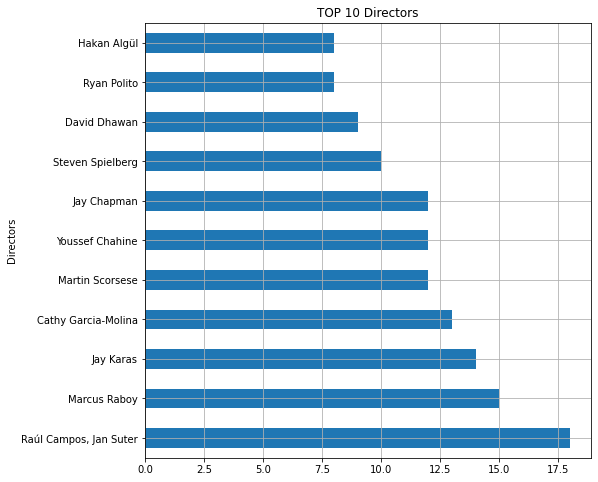

In [50]:
plt.figure(figsize=(8,8))
df["Director"].value_counts().head(11).nlargest(11).plot(kind='barh')
plt.title("TOP 10 Directors")
plt.ylabel("Directors")
plt.grid()

plt.show()

# MOSTLY WATCHED TYPE ON NETFLIX 

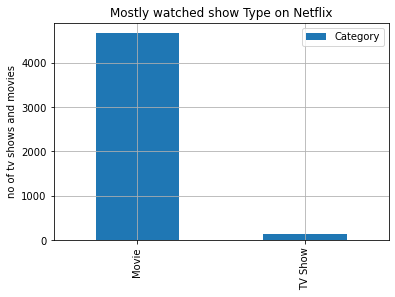

In [51]:
df.Category.value_counts().plot(kind="bar")
plt.title("Mostly watched show Type on Netflix")
plt.ylabel("no of tv shows and movies")

plt.grid()
plt.legend()
plt.show()

## SHOWING THE HIGHEST NUMBER OF TV SHOWS & MOVIES WERE RELASED WITH YEAR

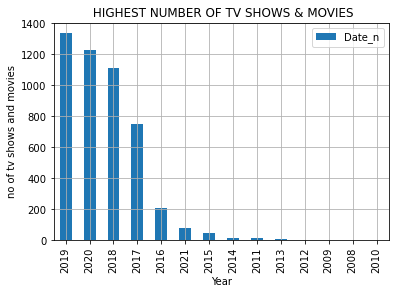

In [40]:
df["Date_n"].dt.year.value_counts().plot(kind="bar")
plt.title(" HIGHEST NUMBER OF TV SHOWS & MOVIES")
plt.ylabel("no of tv shows and movies")
plt.xlabel("Year")
plt.grid()
plt.legend()
plt.show()

# SHOWING THE MOVIES WHICH WERE RELESED IN 2020

In [81]:
df[ (df["Category"] == "Movie") & (df["year"] == 2020)]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year,Minutes,Unit
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,2020-01-01,2020,123,min
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies",2020-06-01,2020,95,min
14,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",2020-03-19,2020,91,min
27,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers",2020-09-08,2020,99,min
28,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",TV-14,95 min,"Documentaries, International Movies",2020-07-01,2020,95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,Movie,"Yours Sincerely, Kanan Gill",Neville Shah,Kanan Gill,India,"April 24, 2020",TV-MA,72 min,Stand-Up Comedy,2020-04-24,2020,72,min
7750,Movie,الف مبروك,Ahmed Nader Galal,"Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...",Egypt,"April 25, 2020",TV-14,115 min,"Comedies, Dramas, International Movies",2020-04-25,2020,115,min
7762,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",TV-PG,109 min,"Comedies, International Movies, Romantic Movies",2020-05-19,2020,109,min
7783,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies",2020-01-11,2020,88,min


# SHOWING THE MOVIES WHICH WERE RELESED IN 2021

In [30]:
df["year"] = df["Date_n"].dt.year

In [31]:
df[ (df["Category"] == "Movie") & (df["year"] == 2021)]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year
57,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,"January 7, 2021",TV-14,101 min,"Dramas, International Movies",2021-01-07,2021
72,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,2021-01-01,2021
104,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,"January 1, 2021",R,83 min,"Action & Adventure, Comedies",2021-01-01,2021
205,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States","January 16, 2021",PG-13,108 min,"Dramas, Sci-Fi & Fantasy",2021-01-16,2021
493,Movie,An Imperfect Murder,James Toback,"Sienna Miller, Alec Baldwin, Charles Grodin, C...",United States,"January 13, 2021",R,71 min,"Dramas, Thrillers",2021-01-13,2021
...,...,...,...,...,...,...,...,...,...,...,...
7147,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,"January 6, 2021",TV-14,99 min,"Documentaries, International Movies, Sports Mo...",2021-01-06,2021
7353,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States","January 1, 2021",PG-13,113 min,"Action & Adventure, Thrillers",2021-01-01,2021
7553,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",TV-MA,102 min,"Comedies, International Movies",2021-01-01,2021
7571,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",TV-14,32 min,Documentaries,2021-01-15,2021


## SHOWING THE TITLES OF TV SHOWS WHICH WERE RELEASED IN INDIA ONLY

In [32]:
df[ (df["Category"] == "TV Show") & (df["Country"] == "India")]["Title"]

132                                 7 (Seven)
2406                                    GHOUL
3119             Jamtara - Sabka Number Ayega
4724                          Paava Kadhaigal
6037    Th Eena Meena Deeka Chase Comedy Show
Name: Title, dtype: object

## TOP 15 COUNTRY'S WHICH RELEASE HIEGHEST TV SHOWS N MOVIES

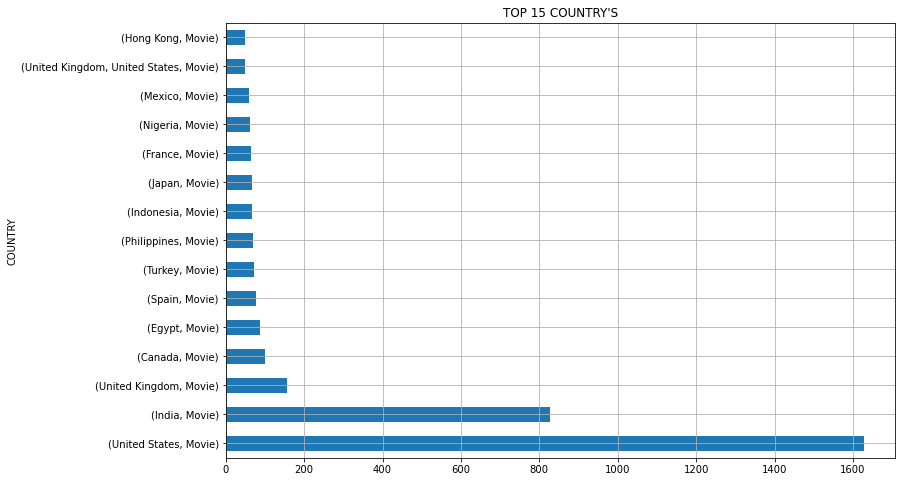

In [34]:
plt.figure(figsize=(12,8))
df.groupby("Country")["Category"].value_counts().nlargest(15).plot(kind="barh")
plt.title("TOP 15 COUNTRY'S")
plt.ylabel("COUNTRY")
plt.grid()

plt.show()

# WHICH COUNTRY HAS THE HIGHEST NUMBER OF TV SHOWS

In [35]:
df_tvshow =  df[df["Category"] == "TV Show"]
df_tvshow.head(1)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",2017-07-01,2017


In [36]:
df_tvshow.Country.value_counts().head(1)

United States    27
Name: Country, dtype: int64

# WHAT IS THE MOST COMMON CATEGORY RELEASE IN NETFLIX

In [52]:
comn = df.Type.value_counts()
comn

Dramas, International Movies                                      306
Stand-Up Comedy                                                   276
Comedies, Dramas, International Movies                            237
Dramas, Independent Movies, International Movies                  213
Children & Family Movies, Comedies                                158
                                                                 ... 
Crime TV Shows, TV Dramas, TV Mysteries                             1
Romantic TV Shows, TV Comedies, TV Dramas                           1
International TV Shows, Spanish-Language TV Shows, TV Comedies      1
Comedies, Cult Movies, LGBTQ Movies                                 1
Anime Features, International Movies                                1
Name: Type, Length: 324, dtype: int64

In [38]:
print("THE MOST COMMON CATEGORY RELEASE Dramas, International Movies:",max(comn))

THE MOST COMMON CATEGORY RELEASE Dramas, International Movies: 306


# TOP 10 GENERS WATCHED ON NETFLIX

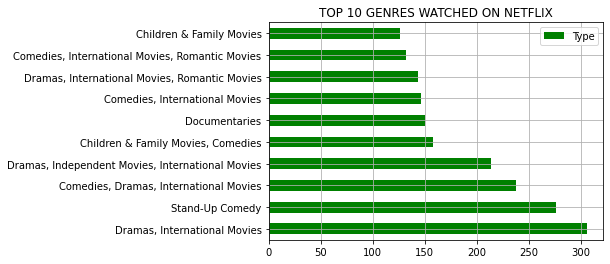

In [39]:
comn.head(10).plot(kind="barh",color="g")
plt.title("TOP 10 GENRES WATCHED ON NETFLIX")
plt.legend()
plt.grid()
plt.show()

# HEAT MAP(CORRELATION)

In [40]:
corr=df.corr()
corr

,year
year,1.0


<AxesSubplot:>

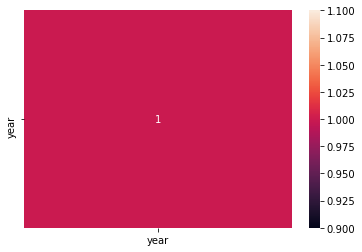

In [41]:
sns.heatmap(df.corr(), annot=True )

In [35]:
df.Type.value_counts()

Dramas, International Movies                                      306
Stand-Up Comedy                                                   276
Comedies, Dramas, International Movies                            237
Dramas, Independent Movies, International Movies                  213
Children & Family Movies, Comedies                                158
                                                                 ... 
Crime TV Shows, TV Dramas, TV Mysteries                             1
Romantic TV Shows, TV Comedies, TV Dramas                           1
International TV Shows, Spanish-Language TV Shows, TV Comedies      1
Comedies, Cult Movies, LGBTQ Movies                                 1
Anime Features, International Movies                                1
Name: Type, Length: 324, dtype: int64

### SHOWING ALL THE RECORDS  WHERE  CATAGORY  IS  MOVIES  AND TYPE  OF COMEDIES  OR COUNTRY  IS  UNITED KIGDOM 

In [42]:
df[(df["Category"] == "Movie") & (df["Type"] == "Comedies") | (df["Country"] == "United Kingdom")]


,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year
33,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,2017-09-08,2017
72,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,2021-01-01,2021
82,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,2018-12-20,2018
84,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,2019-04-16,2019
93,Movie,27: Gone Too Soon,Simon Napier-Bell,"Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...",United Kingdom,"May 1, 2018",TV-MA,70 min,Documentaries,2018-05-01,2018
...,...,...,...,...,...,...,...,...,...,...,...
7615,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,"February 1, 2019",TV-14,50 min,Documentaries,2019-02-01,2019
7623,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States","May 13, 2017",PG-13,86 min,Comedies,2017-05-13,2017
7634,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,"May 10, 2019",R,104 min,Comedies,2019-05-10,2019
7664,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,"August 7, 2020",TV-14,94 min,Comedies,2020-08-07,2020


# SHOWING HIEGHEST COUNTRY ACCORDING TO THE TYPE

<AxesSubplot:ylabel='Type,Country'>

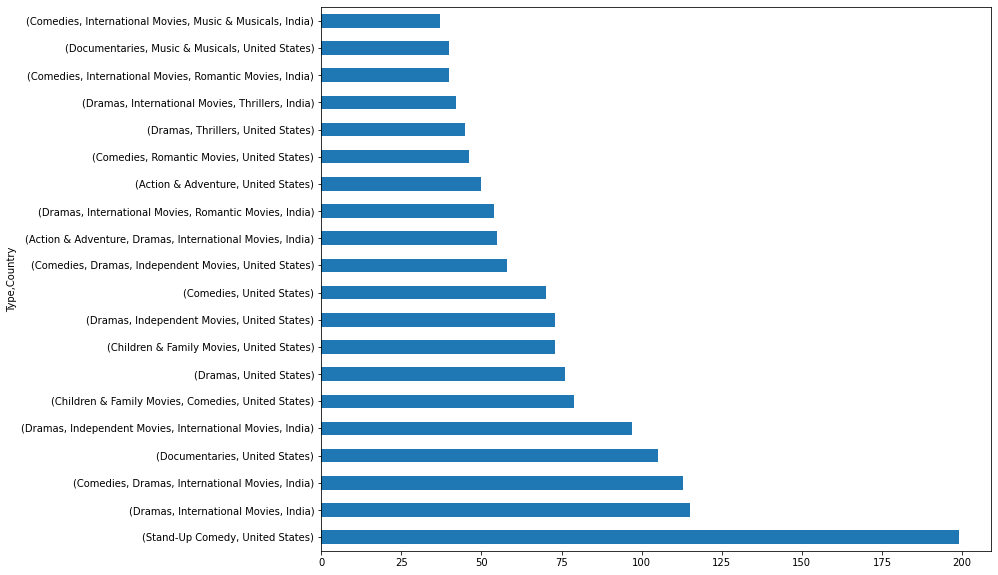

In [31]:
plt.figure(figsize=(12,10))
df.groupby("Type")["Country"].value_counts().nlargest(20).plot(kind="barh")  

# DIFFRENT RATINGD IN NETFLIX

In [42]:
df["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

# MOSTLY WATCHED SHOW TYPE ON NETFLIX

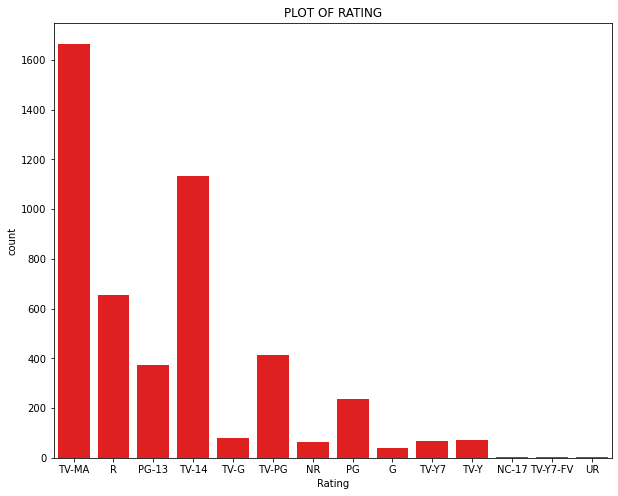

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(df.Rating,color="r")
plt.title("PLOT OF RATING")
plt.show()

## SHOIWNG THE HIGHEST RATING ACOORDING TO THE COUNTRY TOP 20

<AxesSubplot:ylabel='Country,Rating'>

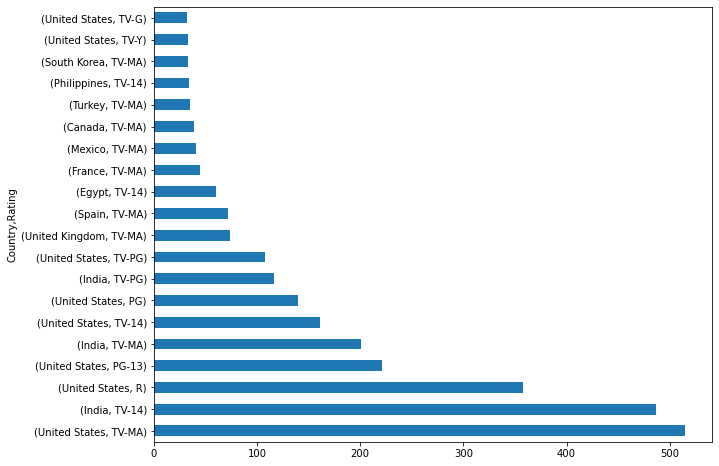

In [30]:
plt.figure(figsize=(10,8))
df.groupby("Country")["Rating"].value_counts().nlargest(20).plot(kind="barh")

# HOW MANY MOVIES GOT "TV-14" RATING IN INDIA

In [45]:
df[(df["Category"] == "Movie") & (df["Rating"] == "TV-14") & (df["Country"] == "India")].shape

(486, 11)

In [46]:
df[(df["Category"] == "Movie") & (df["Rating"] == "TV-14") & (df["Country"] == "India")]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year
8,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies",2019-04-01,2019
18,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",TV-14,124 min,"Comedies, Dramas, Independent Movies",2019-03-29,2019
20,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",TV-14,110 min,"Dramas, Independent Movies, International Movies",2018-09-01,2018
21,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",TV-14,128 min,"Action & Adventure, Dramas, International Movies",2018-09-15,2018
22,Movie,​Maj Rati ​​Keteki,Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,"September 15, 2018",TV-14,117 min,"Dramas, International Movies",2018-09-15,2018
...,...,...,...,...,...,...,...,...,...,...,...
7756,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,"March 1, 2018",TV-14,160 min,"Dramas, International Movies",2018-03-01,2018
7765,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",TV-14,120 min,"Dramas, International Movies",2018-02-15,2018
7766,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",TV-14,159 min,"Comedies, Dramas, International Movies",2019-05-21,2019
7771,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",TV-14,154 min,"Comedies, Dramas, International Movies",2019-12-15,2019


# TV-MA IS THE HIGHEST RATING OF THE DATASET

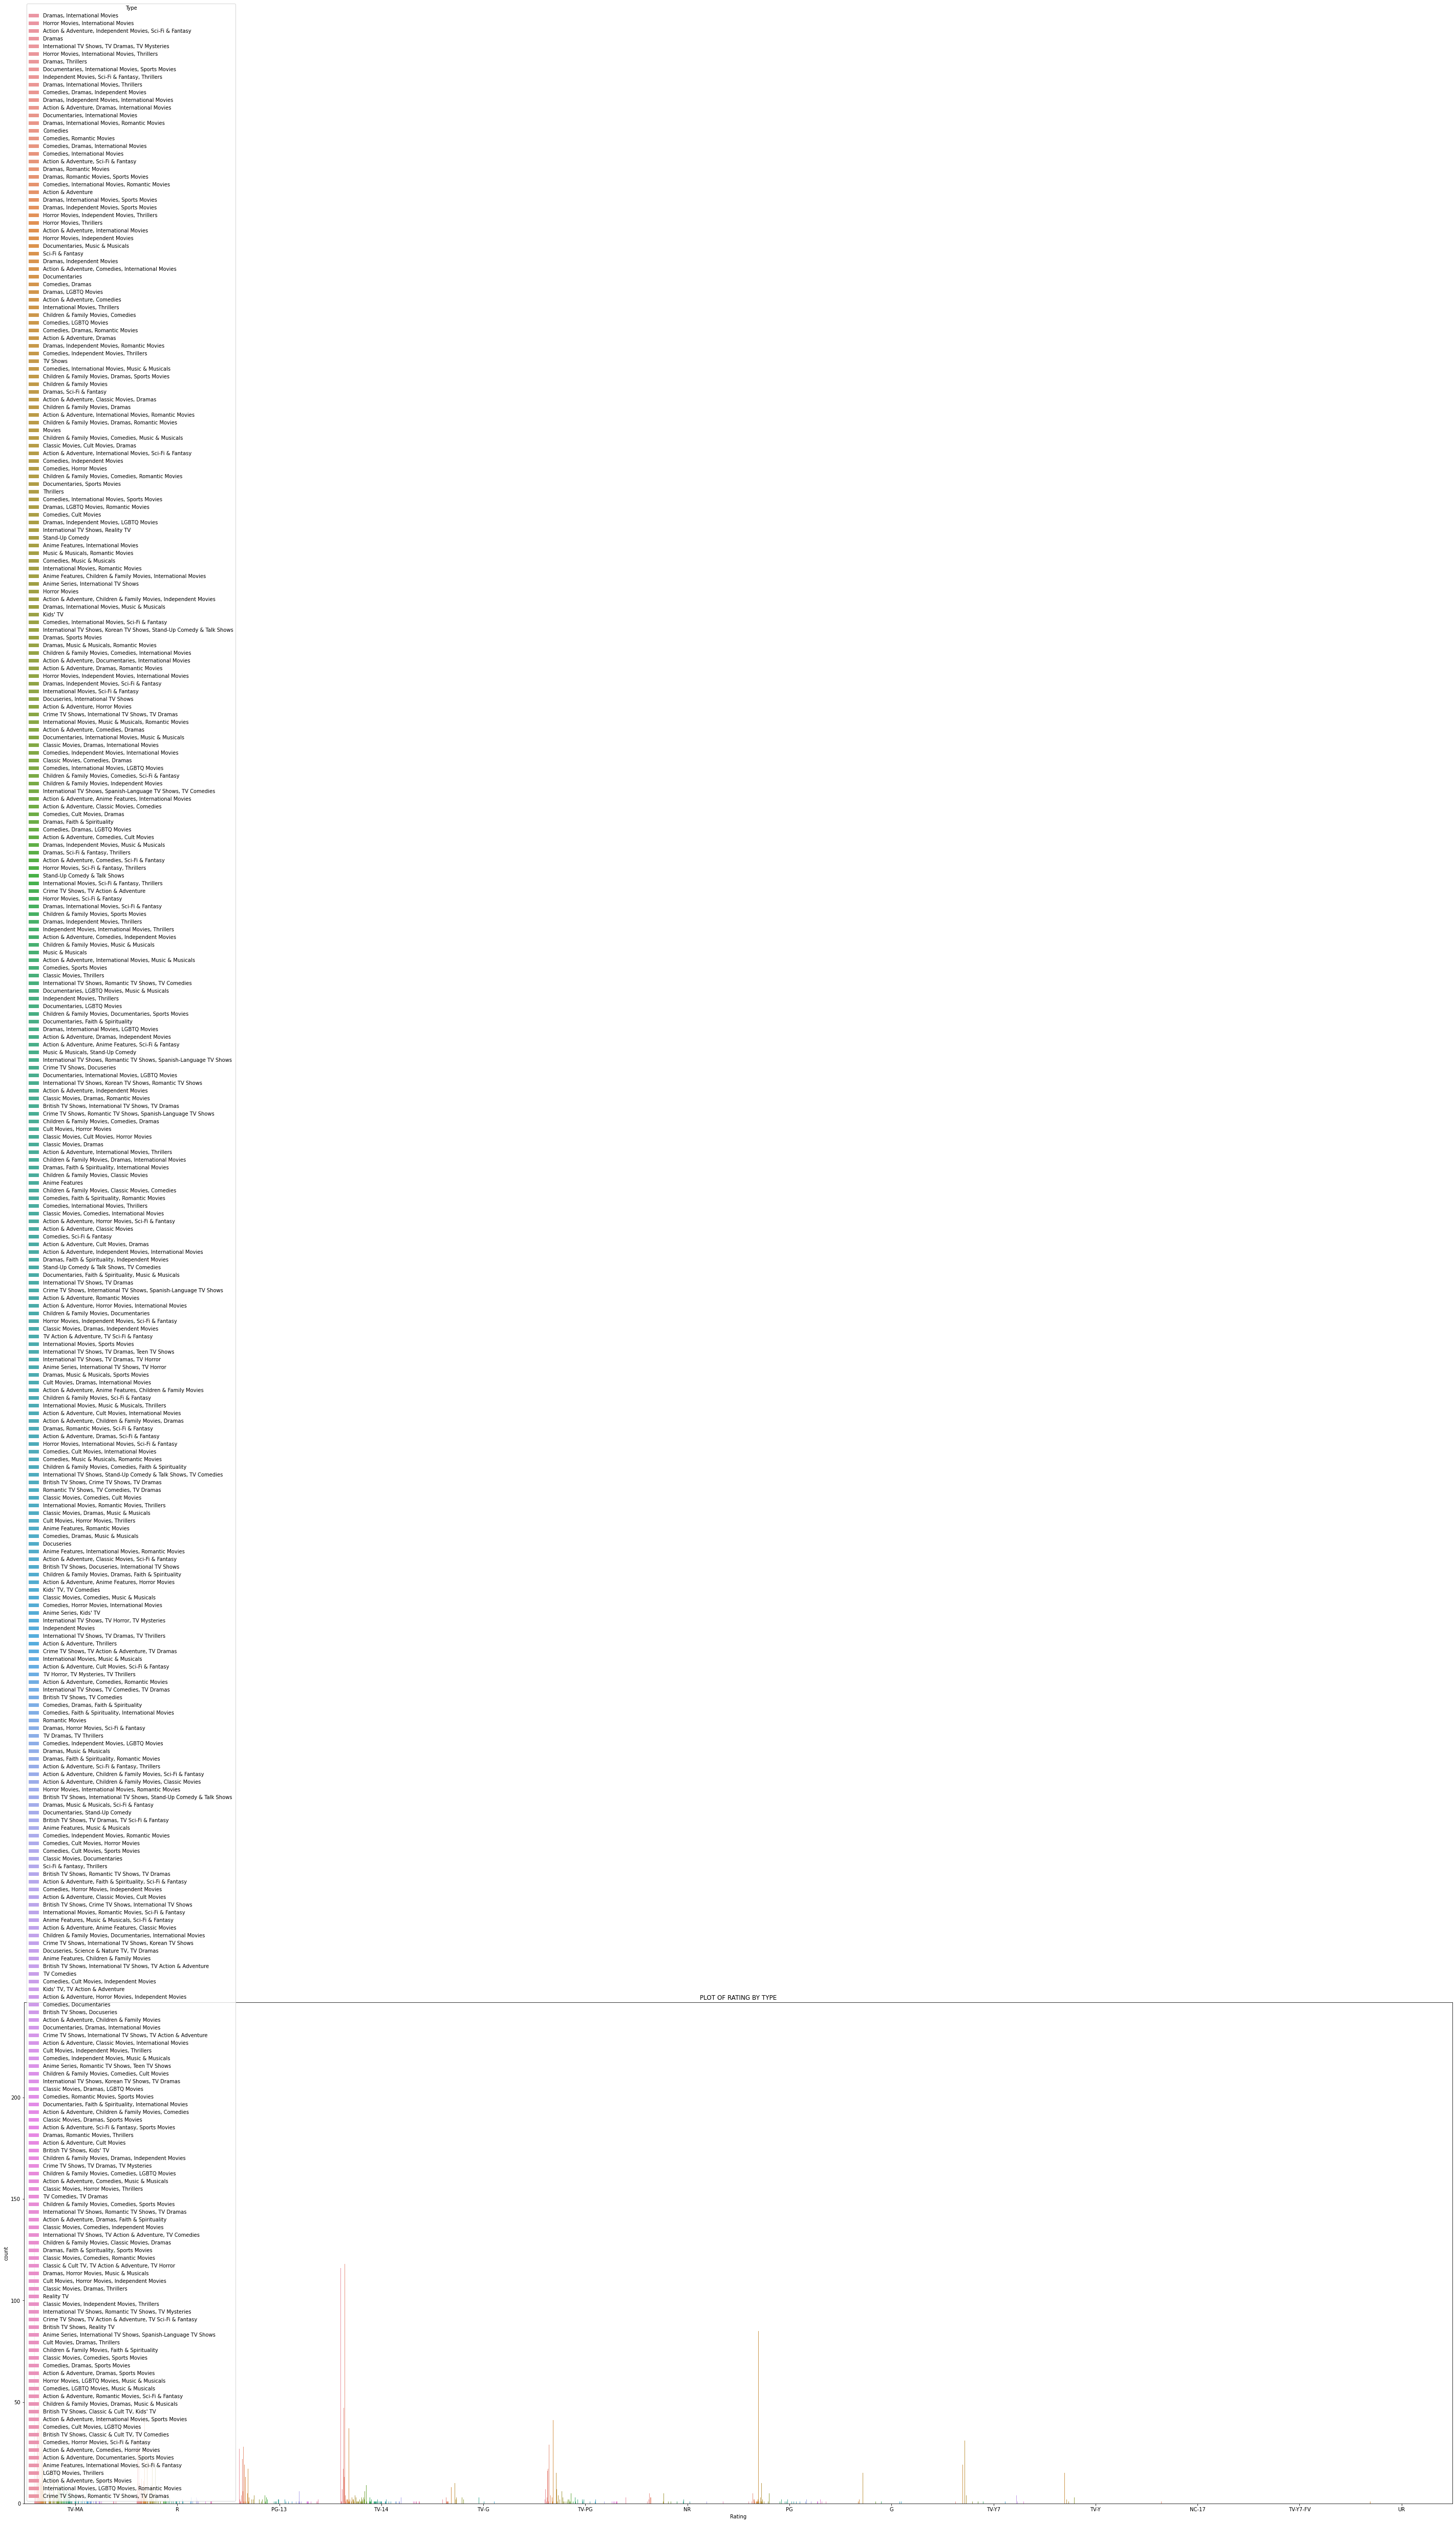

In [59]:
plt.figure(figsize=(50,18))
sns.countplot(x= "Rating", hue="Type",data=df)
plt.title("PLOT OF RATING BY TYPE")
plt.show()

# WHAT IS THE MAXIMUM DURATION OF MOVIES/SHOWS 


In [66]:
df["Duration"].unique()

array(['93 min', '78 min', '80 min', '123 min', '1 Season', '95 min',
       '119 min', '118 min', '143 min', '103 min', '89 min', '91 min',
       '149 min', '144 min', '124 min', '110 min', '128 min', '117 min',
       '100 min', '99 min', '102 min', '104 min', '105 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '87 min', '109 min',
       '101 min', '90 min', '113 min', '114 min', '130 min', '94 min',
       '140 min', '135 min', '82 min', '70 min', '92 min', '164 min',
       '83 min', '116 min', '84 min', '86 min', '120 min', '96 min',
       '126 min', '75 min', '129 min', '77 min', '137 min', '148 min',
       '121 min', '122 min', '176 min', '85 min', '22 min', '68 min',
       '111 min', '29 min', '142 min', '168 min', '59 min', '108 min',
       '44 min', '26 min', '156 min', '98 min', '57 min', '150 min',
       '133 min', '115 min', '154 min', '127 min', '146 min', '136 min',
       '88 min', '131 min', '2 Seasons', '24 min', '112 min', '74 min',
       '

In [67]:
df["Duration"].dtypes

dtype('O')

In [68]:
df[["Minutes" , "Unit"]] = df["Duration"].str.split(" ",expand = True)

In [69]:
df.head(3)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year,Minutes,Unit
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",2016-12-23,2016,93,min
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies",2018-12-20,2018,78,min
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017-11-16,2017,80,min


In [70]:
df["Minutes"].max()

'99'

# SORTING THE DATA BY YEAR

In [71]:
df.sort_values(by="year" , ascending = False).head(5)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year,Minutes,Unit
2269,Movie,Fred Claus,David Dobkin,"Vince Vaughn, Paul Giamatti, John Michael Higg...",United States,"January 1, 2021",PG,115 min,"Children & Family Movies, Comedies",2021-01-01,2021,115,min
2349,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,"January 8, 2021",TV-MA,148 min,"Dramas, International Movies",2021-01-08,2021,148,min
6248,Movie,The Creative Brain,"Jennifer Beamish, Toby Trackman",David Eagleman,United States,"January 1, 2021",TV-14,53 min,Documentaries,2021-01-01,2021,53,min
1673,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand","January 16, 2021",R,94 min,Horror Movies,2021-01-16,2021,94,min
7147,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,"January 6, 2021",TV-14,99 min,"Documentaries, International Movies, Sports Mo...",2021-01-06,2021,99,min


#### FINDING ALL INSTANCE WHERE , CATEGORY IS MOVIE AND TYPE IS DRAMAS OR CATGERORY IS TV SHOW & TYPE IS KINDS TV 


In [72]:
df[ (df["Category"] == "Movie") & (df["Type"] == "Dramas")].head(3)       

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year,Minutes,Unit
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,2020-01-01,2020,123,min
7,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,2019-11-01,2019,119,min
170,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,2019-12-15,2019,110,min


In [73]:
df[ (df["Category"] == "TV Show") & (df["Type"] == "Kids' TV")].head(3)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year,Minutes,Unit
276,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",TV-Y,1 Season,Kids' TV,2020-07-01,2020,1,Season
3582,TV Show,Lego Friends: Girls on a Mission,"Andrew Tan, Stephen Murray","Jasmine St. Clair, Allegra Clark, Rosamund Mar...",Denmark,"February 1, 2019",TV-Y,1 Season,Kids' TV,2019-02-01,2019,1,Season
6204,TV Show,The Cat in the Hat Knows a Lot About That!,Tony Collingwood,"Martin Short, Alexa Torrington, Jacob Ewaniuk,...","Canada, United Kingdom, United States","January 1, 2021",TV-Y,1 Season,Kids' TV,2021-01-01,2021,1,Season


In [74]:
df[ (df["Category"] == "Movie") & (df["Type"] == "Dramas") | (df["Category"] == "TV Show") & (df["Type"] == "Kids' TV")]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Date_n,year,Minutes,Unit
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,2020-01-01,2020,123,min
7,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,2019-11-01,2019,119,min
170,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,2019-12-15,2019,110,min
232,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,2011-10-01,2011,95,min
276,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",TV-Y,1 Season,Kids' TV,2020-07-01,2020,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,"September 5, 2020",R,97 min,Dramas,2020-09-05,2020,97,min
7449,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",TV-MA,99 min,Dramas,2019-06-19,2019,99,min
7465,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",R,109 min,Dramas,2019-03-02,2019,109,min
7480,Movie,War Horse,Steven Spielberg,"Emily Watson, David Thewlis, Peter Mullan, Nie...","United States, India","May 6, 2019",PG-13,147 min,Dramas,2019-05-06,2019,147,min


# PAIRPLOT

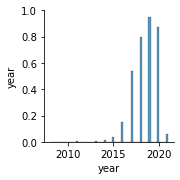

In [75]:
sns.pairplot(df)

# CONCLUSION

## --->From above Netflix alnalysis data

->Top most Directors are "Raul campos & Jan suter"
->Mostly watched type is "Movie"
->Highest number of "TV shows"  & "Movies" as we can obseve the graph is not constant, we can observe that due to the pandamic the shows where released less number of scale
-> As we can see the list of shows 2020 & 2021 we can observe that number of shows where less then the previous year
-> "United States" & "India" relases the highest number of "TV shows"
->The most common category Netflix release is "Dramas , International Movies"
->Catagory of "Movies" & type of Comedies or country of United Kingdom are total 256                     
->Their are top most type of "Movies" & "Shows" are "Drams" & "Comedies"n "Stand-up comedy"  as we can observe that India has the most highest shows in it
->"TV-MA"  has the highest Rating
->At "United States" "TV-MA" is the highest Rating , in India "TV-14" is highest Rating
->486"Movies"  has "TV-14" Rating in India
->93 min is the highest timming of the movie
->118 "TV shows"  & "Movies" are category of "Movies" & type is "Dramas" or category of "TV-show" & Type is "Kid"



# RESULT

## By analysis the things 
->We must focuss the Director & also the type of the category "TV-Ma" & "TV-14" are the high peak in netflix
->Netflix is great platform even in the Pandamic as we can see their was no single movie or shows where relaced in theaters 
->"United States" & "India" is the great country to collaborate
->Must focuss on "Movies"